### UChicago MSFM Project Lab (2023 Spring) with MSUSA

# Time scaling of rating transition matrix

### Imports

In [1]:
import time as tm
import datetime as dtm
import random as rd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as lg

In [2]:
print('>>> the version of pandas package...')
print(pd.__version__)

>>> the version of pandas package...
1.4.4


### Constants

In [3]:
# constants
num_week = 52
dic_scn = {'sp_raw': 'S&P raw',
           'sp_adj': 'S&P adj',
           'mdy_raw': "Moody's raw",
           'mdy_adj': "Moody's adj",
           'test': 'Hypothetical Test',
           }
# constants for visualization
size_figm = (6,5)  #(6,4)
size_figl = (13,5) #(13,4)
size_fntl = 12.0
widh_lin = 0.2
cmap_trg1 = 'YlGnBu'
cmap_trg2 = 'pink'
cmap_trg3 = 'vlag'
cmap_trg4 = 'PuOr'
# 'Paired', 'Accent', 'CMRmap', 'CMRmap_r', 'brg_r', 'gnuplot', 'plasma', 'YlOrBr', 'Reds', 'PuRd', 'PuOr', autumn', 'Spectral'
cmaps_trg = (cmap_trg1,cmap_trg2)
# figure parameters
val_cmin = 0.00
val_cmax = 0.95
val_cneg = -5.0e-5
# titles
subtitle1 = 'Probability Heatmap'
subtitle2 = 'Negative Probability Grid'
subtitle3 = 'Real Part of the Matrix'
subtitle4 = 'Imaginary Part of the Matrix'

## 1. Preparation

### 1.2. Helper Functions

In [4]:
#%% ####################################################################
# Helper function
# ######################################################################
def heatmap_matrix(mtx,vmin,vmax,cmap=cmap_trg1,header=None):
    fig, ax = plt.subplots(figsize=size_figm)
    sns.heatmap(mtx,linewidth=widh_lin,cmap=cmap,vmin=vmin,vmax=vmax,ax=ax)
    if header is not None:
        fig.suptitle(header,fontsize=size_fntl,x=0.46,y=0.96)
    plt.show()

def multi_heatmap_matrix(mtx,vmins,vmaxs,cmaps,header=None,submtx=np.nan,sub1=subtitle1,sub2=subtitle2):
    try:
        submtx.empty
    except:
        submtx = mtx.copy()
    fig, ax = plt.subplots(1,2,figsize=size_figl)
    sns.heatmap(mtx,linewidth=widh_lin,cmap=cmaps[0],vmin=vmins[0],vmax=vmaxs[0],ax=ax[0])
    sns.heatmap(submtx,linewidth=widh_lin,cmap=cmaps[1],vmin=vmins[1],vmax=vmaxs[1],ax=ax[1])
    ax[0].set_title(sub1)
    ax[1].set_title(sub2)
    if header is not None:
        fig.suptitle(header,fontsize=size_fntl,x=0.50,y=01.00)
    plt.show()
    
def build_rtm_df(arr,lst_idx):
    return pd.DataFrame(arr,index=lst_idx,columns=lst_idx)

## 2. Scaling by power roots (example of RTM from rating agencies)

In our xVA pricings/trading, rating plays an important role, however, there is no common standard or theory how to consider the risk of rating changes. One of useful reference is to use rating transition data or rating transition matrix that some rating agencies publish.

The rating transition matrices are typically estimated from their historical sample data on annual basis, whilst we would like to use the information at more glanular scale (e.g. weekly). The historically estimated RTM does not guarantee any mathematically useful features, which implies that the matrix may not have power root with real numbers, or may contain negative probabilities even available in real numbers.

### 2.1. Import Data

In [5]:
#%% ####################################################################
# Setting
# ######################################################################
# keys for simulations
file_mtx = 'transitionmatrix.xlsx'
sht_trg = 'sp_adj'
trg_src = dic_scn[sht_trg]
# 'sp_raw', 'sp_adj', 'mdy_raw', 'mdy_adj', 'test'


In [7]:
#%% ####################################################################
# Data extraction
# ######################################################################
# data feed
df_raw = pd.read_excel(file_mtx,sheet_name=sht_trg,index_col=0)
lst_rating = list(df_raw.index)
# rating transition matrix
df_rtm = df_raw[lst_rating]


### 2.2. Original RTM (Annual)

Here is the RTM (Rating Transition Matrix) published by S&P Global (but adjusted to exclude transition to non-rated and scaled the matrix to make the total probability to be exact one). Diagonal components (probabilities to keep the current ratings) are close to be one.

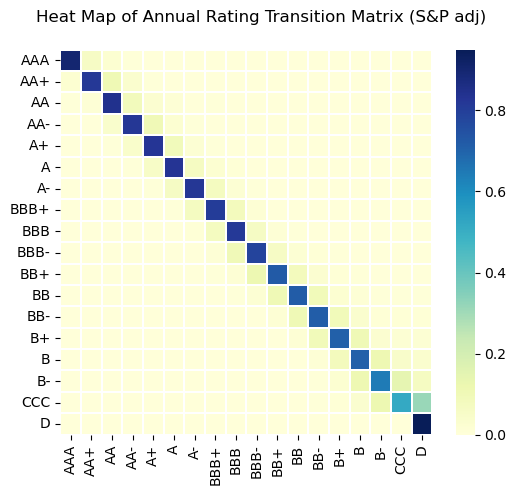

In [8]:
#%% ####################################################################
# Annual
# ######################################################################
# params aggregatese
vmins_trg = (val_cmin, val_cneg)
vmaxs_trg = (val_cmax, val_cmin)
# visualize
title = 'Heat Map of Annual Rating Transition Matrix ('+trg_src+')'
heatmap_matrix(df_rtm,vmin=val_cmin,vmax=val_cmax,header=title)


### 2.3. Semi-Annually (SA) scaled RTM by square root

Here is the RTM scaled to semi-annual basis by taking the square root of the RTM. A table right side shows grids where components are negative numbers.

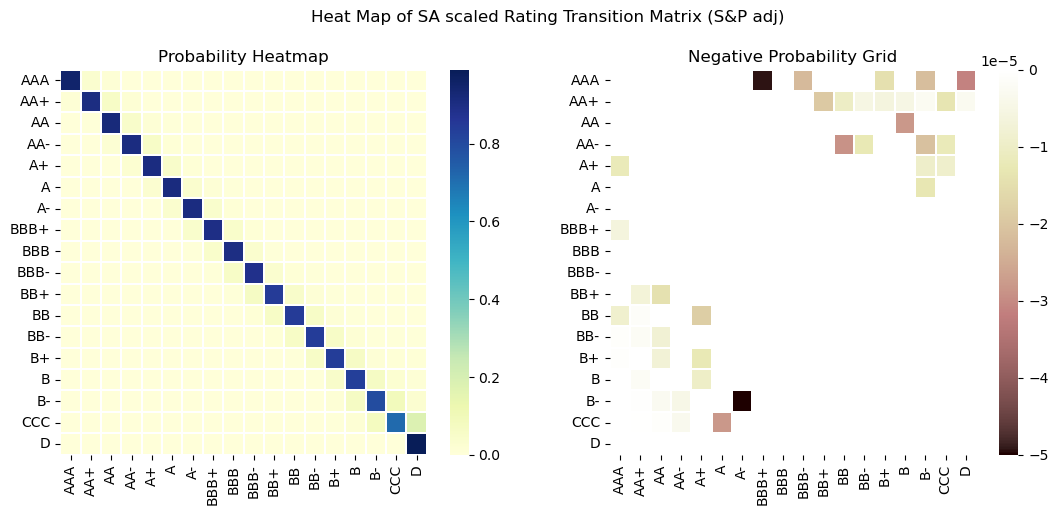

In [9]:
#%% ####################################################################
# Semi-Annually
# ######################################################################
r2_rtm = build_rtm_df(lg.sqrtm(df_rtm),lst_rating)

# params aggregatese
vmins_trg = (val_cmin, -5.0e-5)
vmaxs_trg = (0.99, val_cmin)
# visualization
title = 'Heat Map of SA scaled Rating Transition Matrix ('+trg_src+')'
multi_heatmap_matrix(r2_rtm,vmins_trg,vmaxs_trg,cmaps_trg,header=title)


### 2.4. Quarterly scaled RTM by quadratic root

Here is the RTM scaled to quarterly basis by taking the quadratic root of the RTM. A table right side shows grids where components are negative numbers.

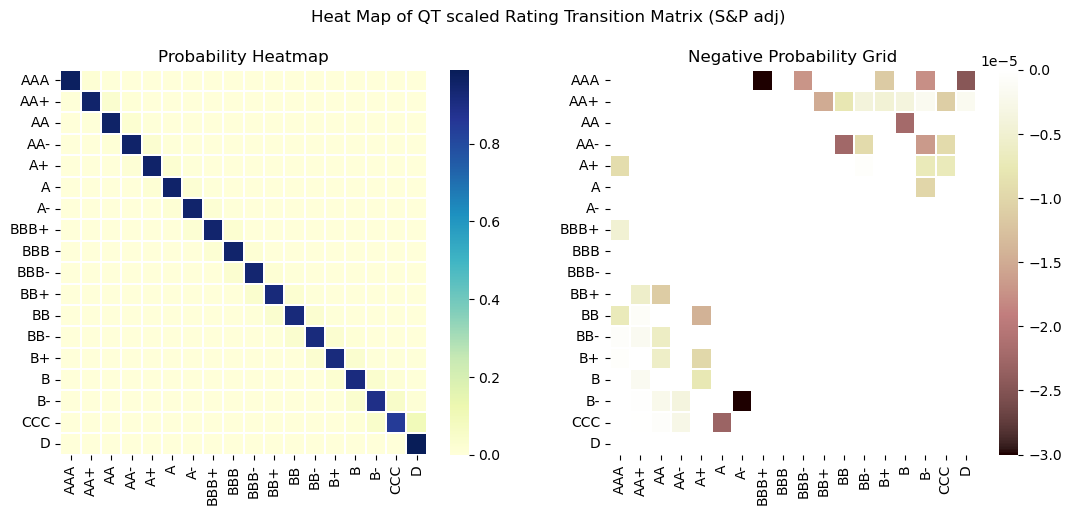

In [10]:
#%% ####################################################################
# Quarterly
# ######################################################################
r4_rtm = build_rtm_df(lg.sqrtm(r2_rtm),lst_rating)

# params aggregatese
vmins_trg = (val_cmin, -3.0e-5)
vmaxs_trg = (0.99, val_cmin)
# visualization
title = 'Heat Map of QT scaled Rating Transition Matrix ('+trg_src+')'
multi_heatmap_matrix(r4_rtm,vmins_trg,vmaxs_trg,cmaps_trg,header=title)


### 2.5. Weekly scaled RTM by 52nd power root

Here is the RTM scaled to weekly basis by taking 52nd power root of the RTM. A table right side shows grids where components are negative numbers.

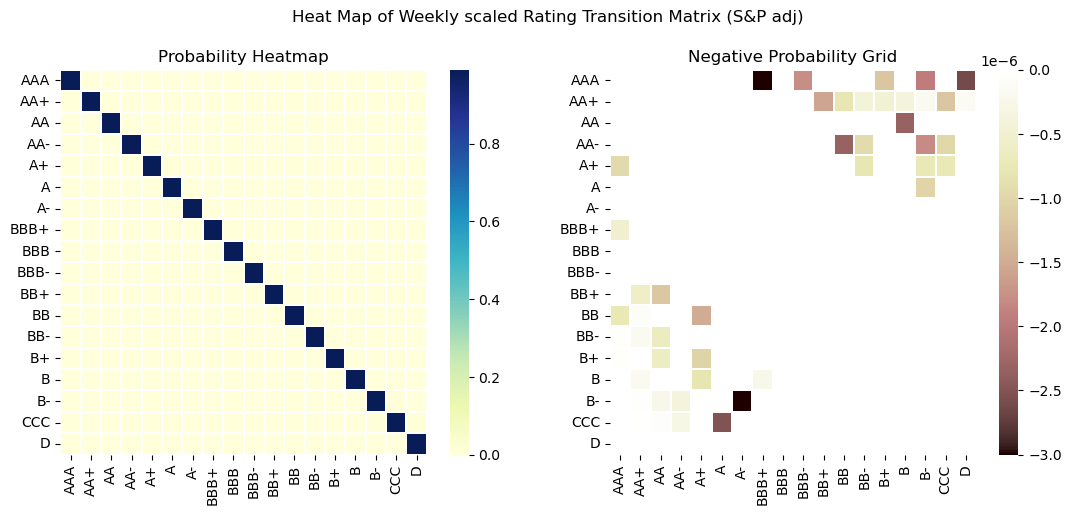

In [11]:
#%% ####################################################################
# Weekly
# ######################################################################
r52_rtm = build_rtm_df(lg.fractional_matrix_power(df_rtm,1.0/num_week),lst_rating)

# params aggregatese
vmins_trg = (val_cmin, -3.0e-6)
vmaxs_trg = (0.99, val_cmin)
# visualization
title = 'Heat Map of Weekly scaled Rating Transition Matrix ('+trg_src+')'
multi_heatmap_matrix(r52_rtm,vmins_trg,vmaxs_trg,cmaps_trg,header=title)


### 2.6. Weekly scaled RTM floored at zero vs replication

When taking positive part of the weekly scaled RTM (e.g. floored at zero) and revert back to annual scale by raising to 52nd power, the reverted annula matrix shows minor difference from the original matrix, whose error comes from negative numbers cut off at weekly scale. 

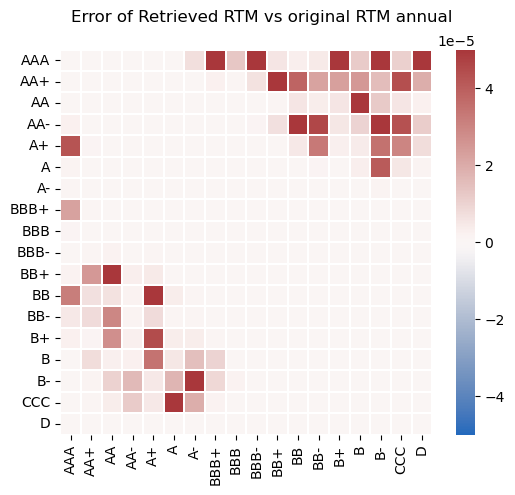

In [12]:
#%% ####################################################################
# Floored at zero
# ######################################################################
r52_rtm_floored = np.maximum(r52_rtm,0.0)
rtm_recovered = build_rtm_df(lg.fractional_matrix_power(r52_rtm_floored,num_week),lst_rating)
rtm_error = rtm_recovered-df_rtm

# figure parameters
err_cmax =  5.0e-5
err_cmin = -5.0e-5
# visualize
title = 'Error of Retrieved RTM vs original RTM annual'
heatmap_matrix(rtm_error,vmin=err_cmin,vmax=err_cmax,cmap=cmap_trg3,header=title)


## 3. Scaling another case (example of hypothetical RTM)

### 3.1. Sample case that shows complex components in its power root

Here is another RTM (Rating Transition Matrix) personally manipulated (in order to see if a RTM is far from diagonal identity matrix). Diagonal components (probabilities to keep the current ratings) still shows higher numbers than others, but there are certain probabilities of transition to other ratings here.

In [14]:
#%% ####################################################################
# Setting for Complex numbers
# ######################################################################
# keys for simulations
sht_trg = 'test'
trg_src = dic_scn[sht_trg]
# data extraction
df_raw = pd.read_excel(file_mtx,sheet_name=sht_trg,index_col=0)
lst_rating = list(df_raw.index)
# rating transition matrix
df_rtm = df_raw[lst_rating]


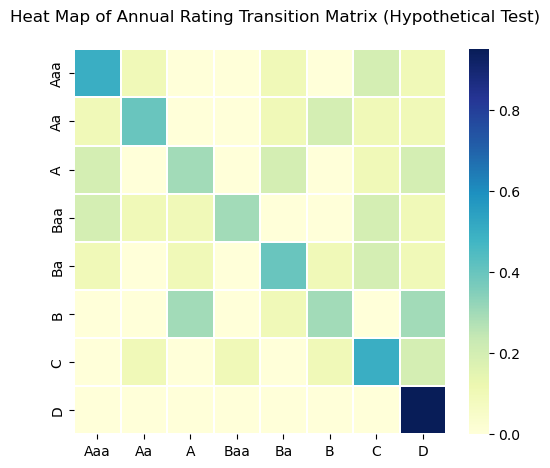

In [15]:
# visualize
title = 'Heat Map of Annual Rating Transition Matrix ('+trg_src+')'
heatmap_matrix(df_rtm,vmin=val_cmin,vmax=val_cmax,header=title)

### 3.2. Weekly scaled RTM by 52nd power root

Here is the RTM scaled to weekly basis by taking 52nd power root of the RTM. In this case, no only seeing negative probabilities, we observe some complex numbers in the scaled matrix. A table left side shows grids where components are negative numbers. Also a table right side shows magnitude of imaginary part of the components.

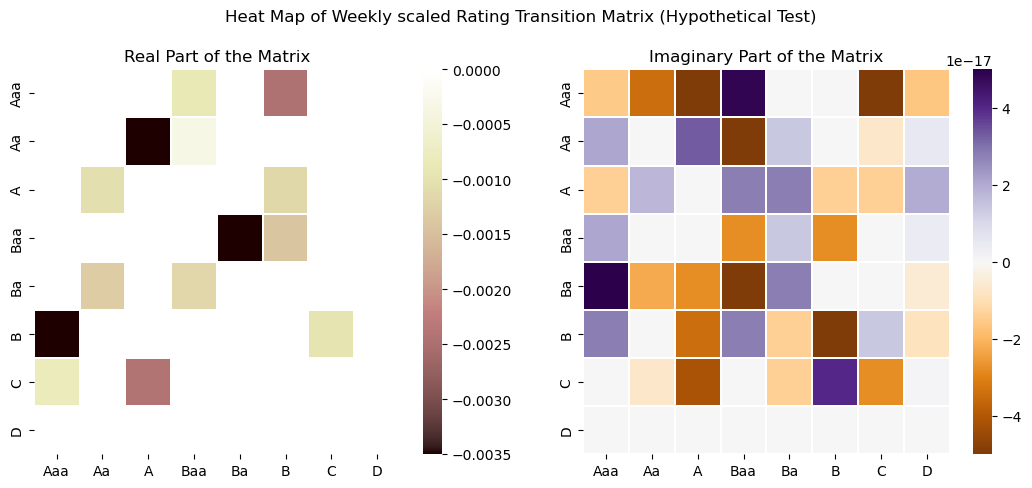

In [16]:
#%% ####################################################################
# Complex roots
# ######################################################################
r52_rtm = build_rtm_df(lg.fractional_matrix_power(df_rtm,1.0/num_week),lst_rating)

r52_rtm_real = build_rtm_df(np.real(r52_rtm),lst_rating)
r52_rtm_imag = build_rtm_df(np.imag(r52_rtm),lst_rating)
# params aggregatese
vmins_trg = (-3.5e-3, -5.0e-17)
vmaxs_trg = (val_cmin, 5.0e-17)
this_cmaps = (cmap_trg2,cmap_trg4)
title = 'Heat Map of Weekly scaled Rating Transition Matrix ('+trg_src+')'
multi_heatmap_matrix(r52_rtm_real,vmins_trg,vmaxs_trg,this_cmaps,header=title,\
                     submtx=r52_rtm_imag,sub1=subtitle3,sub2=subtitle4)


### 3.3. Weekly scaled RTM with real part floored at zero vs replication

When taking positive members of the real part from the weekly scaled RTM (e.g. real part floored at zero) and revert back to annual scale by raising to 52nd power, the reverted annula matrix shows non-negligible difference from the original matrix, out of which the biggest error is around 10%. 

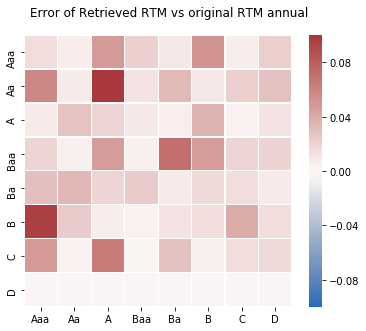

In [30]:
#%% ####################################################################
# Real/Positive part
# ######################################################################
r52_rtm_real_floored = np.maximum(r52_rtm_real,0.0)
rtm_recovered = build_rtm_df(lg.fractional_matrix_power(r52_rtm_real_floored,num_week),lst_rating)
rtm_error = rtm_recovered-df_rtm

# figure parameters
err_cmax =  1.0e-1
err_cmin = -1.0e-1
# visualize
title = 'Error of Retrieved RTM vs original RTM annual'
heatmap_matrix(rtm_error,vmin=err_cmin,vmax=err_cmax,cmap=cmap_trg3,header=title)

## 4. Goals of the project

If an annual rating martix is estimated under strong mathematical assumptions and restrictions, power rooting would be one of the the best estimates.
However, we already know that the RTMs even that rating agencies publish are mathematically "dirty", so we would seek another reasonable way to estimate weekly scaled RTM using statistical inferences.